<a href="https://colab.research.google.com/github/Koosj/Final-Team4/blob/main/Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

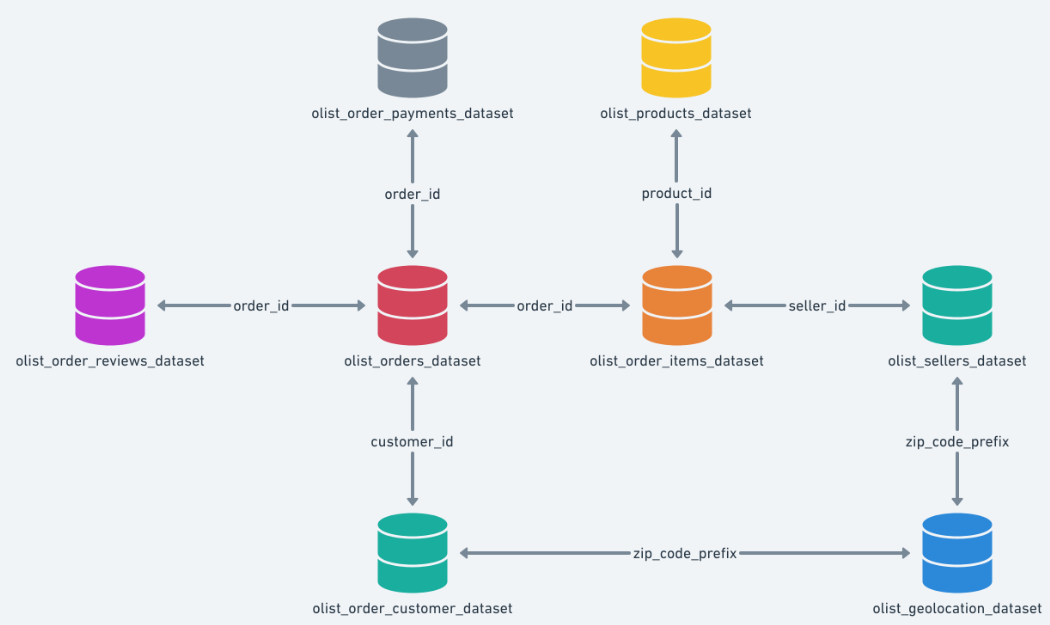

In [ ]:
import pandas as pd

# 1. 데이터 로딩 (파일 경로는 상황에 맞게 조정)
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_orders_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_reviews_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_customers_dataset.csv')

items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_sellers_dataset.csv')
geo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_geolocation_dataset.csv')

eng_name = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/product_category_name_translation.csv')
maketing_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_closed_deals_dataset.csv')
maketing_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/olist_marketing_qualified_leads_dataset.csv')

# 2. 리뷰 데이터 병합 (order_id 기준)
merged = pd.merge(orders, reviews, on='order_id', how='left')

# 3. 고객 데이터 병합 (customer_id 기준)
merged = pd.merge(merged, customers, on='customer_id', how='left')

# 4. 결제 데이터 병합 (order_id 기준)
merged = pd.merge(merged, payments, on='order_id', how='left')
# 3. 고객 데이터 병합 (product_id 기준)
merged = pd.merge(merged, customers, on='customer_id', how='left')

# 4. 결제 데이터 병합 (order_id 기준)
merged = pd.merge(merged, payments, on='order_id', how='left')

# 결과 확인
print(merged.shape)
merged.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 0: invalid continuation byte

In [ ]:
# 최신 이미지 기준 대분류 매핑 딕셔너리
category_to_main = {
    # 패션
    "fashion_bolsas_e_acessorios": "패션",
    "fashion_calcados": "패션",
    "fashion_esporte": "패션",
    "fashion_roupa_feminina": "패션",
    "fashion_roupa_infanto_juvenil": "패션",
    "fashion_roupa_masculina": "패션",
    "fashion_underwear_e_moda_praia": "패션",
    "malas_acessorios": "패션",
    "relogios_presentes": "패션",

    # 헬스/뷰티
    "beleza_saude": "헬스/뷰티",
    "perfumaria": "헬스/뷰티",

    # 가구/인테리어
    "cama_mesa_banho": "가구/인테리어",
    "casa_conforto": "가구/인테리어",
    "casa_conforto_2": "가구/인테리어",
    "moveis_colchao_e_estofado": "가구/인테리어",
    "moveis_cozinha_area_de_servico_jantar_e_jardim": "가구/인테리어",
    "moveis_decoracao": "가구/인테리어",
    "moveis_escritorio": "가구/인테리어",
    "moveis_quarto": "가구/인테리어",
    "moveis_sala": "가구/인테리어",

    # 가전/전자
    "audio": "가전/전자",
    "climatizacao": "가전/전자",
    "construcao_ferramentas_iluminacao": "가전/전자",
    "eletrodomesticos": "가전/전자",
    "eletrodomesticos_2": "가전/전자",
    "eletronicos": "가전/전자",
    "eletroportateis": "가전/전자",
    "informatica_acessorios": "가전/전자",
    "pc_gamer": "가전/전자",
    "pcs": "가전/전자",
    "portateis_casa_forno_e_cafe": "가전/전자",
    "portateis_cozinha_e_preparadores_de_alimentos": "가전/전자",
    "tablets_impressao_imagem": "가전/전자",
    "telefonia": "가전/전자",
    "telefonia_fixa": "가전/전자",

    # 생활용품
    "bebes": "생활용품",
    "flores": "생활용품",
    "fraldas_higiene": "생활용품",
    "la_cuisine": "생활용품",
    "papelaria": "생활용품",
    "pet_shop": "생활용품",
    "utilidades_domesticas": "생활용품",
    "alimentos": "생활용품",
    "alimentos_bebidas": "생활용품",
    "bebidas": "생활용품",

    # 취미/여가
    "artes": "취미/여가",
    "artes_e_artesanato": "취미/여가",
    "automotivo": "취미/여가",
    "brinquedos": "취미/여가",
    "cine_foto":  "취미/여가",
    "consoles_games": "취미/여가",
    "esporte_lazer":  "취미/여가",
    "instrumentos_musicais": "취미/여가",

    # 서적/DVD
    "cds_dvds_musicais": "서적/DVD",
    "dvds_blu_ray": "서적/DVD",
    "livros_importados": "서적/DVD",
    "livros_interesse_geral": "서적/DVD",
    "livros_tecnicos": "서적/DVD",
    "musica": "서적/DVD",

     # 산업/건축
    "agro_industria_e_comercio ": "산업/건축",
    "casa_construcao": "산업/건축",
    "construcao_ferramentas_construcao": "산업/건축",
    "construcao_ferramentas_ferramentas": "산업/건축",
    "construcao_ferramentas_seguranca": "산업/건축",
    "industria_comercio_e_negocios": "산업/건축",
    "sinalizacao_e_seguranca": "산업/건축",
    "construcao_ferramentas_jardim": "산업/건축",
    "ferramentas_jardim": "산업/건축",


    # 기타
    "artigos_de_festas": "기타",
    "artigos_de_natal": "기타",
    "cool_stuff": "기타",
    "market_place ": "기타",
    "seguros_e_servicos": "기타"
}


# 번역 정보
category_translations = {
    # 패션
    "fashion_bolsas_e_acessorios": "패션 가방 및 액세서리",
    "fashion_calcados": "신발",
    "fashion_esporte": "스포츠 의류",
    "fashion_roupa_feminina": "여성 의류",
    "fashion_roupa_infanto_juvenil": "아동/청소년 의류",
    "fashion_roupa_masculina": "남성 의류",
    "fashion_underwear_e_moda_praia": "속옷 및 수영복",
    "malas_acessorios": "여행가방 및 액세서리",
    "relogios_presentes": "시계 및 선물용품",

    # 헬스/뷰티
    "beleza_saude": "뷰티/건강",
    "perfumaria": "향수",

    # 가구/인테리어
    "cama_mesa_banho": "침구/욕실/테이블용품",
    "casa_conforto": "홈 데코",
    "casa_conforto_2": "홈 데코2",
    "moveis_colchao_e_estofado": "가구 (매트리스 및 소파류)",
    "moveis_cozinha_area_de_servico_jantar_e_jardim": "주방/서비스 공간/야외 가구",
    "moveis_decoracao": "인테리어 가구",
    "moveis_escritorio": "사무용 가구",
    "moveis_quarto": "침실 가구",
    "moveis_sala": "거실 가구",

    # 가전/전자
    "audio": "오디오",
    "climatizacao": "냉난방 기기",
    "construcao_ferramentas_iluminacao": "조명 기구",
    "eletrodomesticos": "가전제품",
    "eletrodomesticos_2": "가전제품2",
    "eletronicos": "전자제품",
    "eletroportateis": "소형 가전제품",
    "informatica_acessorios": "컴퓨터/IT 액세서리",
    "pc_gamer": "게이밍 PC",
    "pcs": "컴퓨터",
    "portateis_casa_forno_e_cafe": "소형 가전 (오븐/커피)",
    "portateis_cozinha_e_preparadores_de_alimentos": "소형 주방가전",
    "tablets_impressao_imagem": "태블릿/프린터/이미지 장비",
    "telefonia": "휴대폰",
    "telefonia_fixa": "유선전화",

    # 생활용품
    "bebes": "유아용품",
    "flores": "꽃",
    "fraldas_higiene": "기저귀 및 위생용품",
    "la_cuisine": "주방용품",
    "papelaria": "문구류",
    "pet_shop": "반려동물 용품",
    "utilidades_domesticas": "생활용품",
    "alimentos": "식품",
    "alimentos_bebidas": "식품 및 음료",
    "bebidas": "음료",

    # 취미/여가
    "artes": "예술",
    "artes_e_artesanato": "예술 및 수공예",
    "automotivo": "자동차 용품",
    "brinquedos": "장난감",
    "cine_foto":  "카메라/사진장비",
    "consoles_games": "콘솔 및 게임",
    "esporte_lazer":  "스포츠 및 레저",
    "instrumentos_musicais": "악기",

    # 서적/DVD
    "cds_dvds_musicais": "CD/DVD/음악",
    "dvds_blu_ray": "DVD/블루레이",
    "livros_importados": "수입 서적",
    "livros_interesse_geral": "일반 서적",
    "livros_tecnicos": "기술 서적",
    "musica": "음악 관련 상품",

     # 산업/건축
    "agro_industria_e_comercio ": "농업/산업 및 상업",
    "casa_construcao": "건축 자재",
    "construcao_ferramentas_construcao": "건축 공구",
    "construcao_ferramentas_ferramentas": "공구",
    "construcao_ferramentas_seguranca": "안전장비",
    "industria_comercio_e_negocios": "산업/비즈니스 장비",
    "sinalizacao_e_seguranca": "안전 및 표시 장비",
    "construcao_ferramentas_jardim": "정원용 공구",
    "ferramentas_jardim": "정원 공구",


    # 기타
    "artigos_de_festas": "파티용품",
    "artigos_de_natal": "크리스마스 용품",
    "cool_stuff": "재미있는 잡화",
    "market_place ": "마켓플레이스 (잡화류)",
    "seguros_e_servicos": "보험 및 서비스"
}

# 리스트로 변환
data = [
    {
        "영문 카테고리": cat,
        "한글 번역": category_translations.get(cat, "번역 없음"),
        "대분류": category_to_main[cat]
    }
    for cat in category_to_main
]

# DataFrame 생성
df = pd.DataFrame(data)

# 출력
print(df)
